In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = VGG16(include_top=False,
                 weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
model.trainable = False
model = Sequential([model,
                    GlobalAveragePooling2D(),
                    Dense(2, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
valid_dir = os.path.join(PATH, 'validation')

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
BATCH_SIZE = 32
image_height = 160
image_width = 160

In [ ]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")


Found 2000 images belonging to 2 classes.


In [ ]:
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/10
63/63 - 33s - loss: 0.6660 - accuracy: 0.6335 - val_loss: 0.6180 - val_accuracy: 0.7720 - 33s/epoch - 518ms/step
Epoch 2/10
63/63 - 22s - loss: 0.6031 - accuracy: 0.7765 - val_loss: 0.5592 - val_accuracy: 0.8170 - 22s/epoch - 342ms/step
Epoch 3/10
63/63 - 20s - loss: 0.5588 - accuracy: 0.8050 - val_loss: 0.5199 - val_accuracy: 0.8290 - 20s/epoch - 315ms/step
Epoch 4/10
63/63 - 20s - loss: 0.5237 - accuracy: 0.8135 - val_loss: 0.4872 - val_accuracy: 0.8260 - 20s/epoch - 324ms/step
Epoch 5/10
63/63 - 20s - loss: 0.4983 - accuracy: 0.8160 - val_loss: 0.4628 - val_accuracy: 0.8350 - 20s/epoch - 319ms/step
Epoch 6/10
63/63 - 20s - loss: 0.4793 - accuracy: 0.8245 - val_loss: 0.4449 - val_accuracy: 0.8320 - 20s/epoch - 312ms/step
Epoch 7/10
63/63 - 21s - loss: 0.4633 - accuracy: 0.8275 - val_loss: 0.4266 - val_accuracy: 0.8400 - 21s/epoch - 327ms/step
Epoch 8/10
63/63 - 20s - loss: 0.4460 - accuracy: 0.8320 - val_loss: 0.4128 - val_accuracy: 0.8440 - 20s/epoch - 323ms/step
Epoch 9/

Text(0.5, 1.0, 'loss')

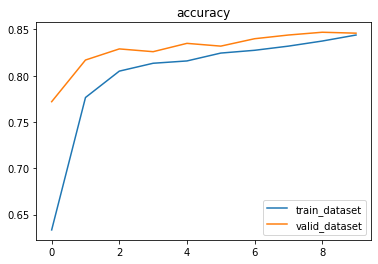

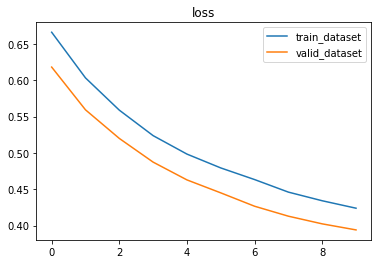

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="train_dataset")
plt.plot(epochs, val_accuracy, label="valid_dataset")
plt.legend()
plt.title('accuracy')
plt.figure()


plt.plot(epochs, loss, label="train_dataset")
plt.plot(epochs, val_loss, label="valid_dataset")
plt.legend()
plt.title('loss')


1/1 [==============================] - 0s 249ms/step


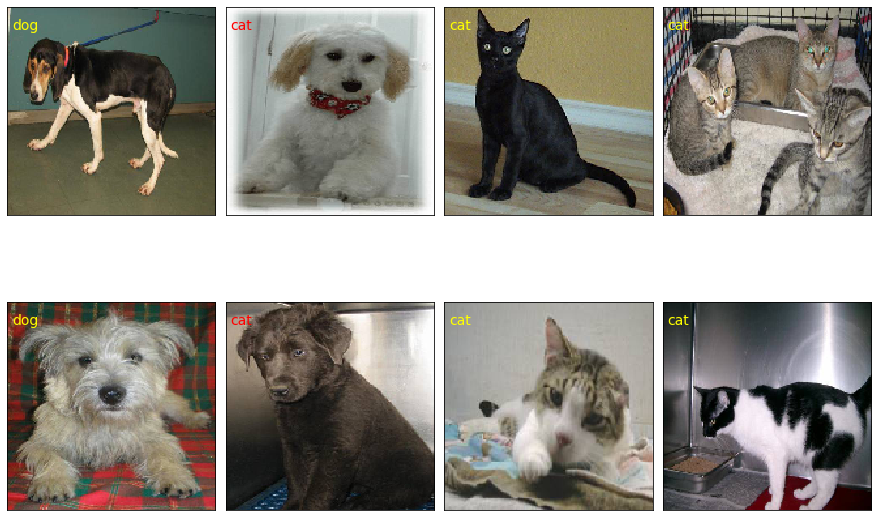

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)
